# Q1


In [298]:
import pandas as pd
from  sklearn.neighbors import KNeighborsClassifier


In [299]:
df = pd.read_csv('Breast Cancer Wisconsin.csv')

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Sample code number                  699 non-null    int64 
 1   Clump Thickness                     699 non-null    int64 
 2   Uniformity of Cell Size             699 non-null    int64 
 3   Uniformity of Cell Shape            699 non-null    int64 
 4   Marginal Adhesion                   699 non-null    int64 
 5   Single Epithelial Cell Size         699 non-null    int64 
 6   Bare Nuclei                         699 non-null    object
 7   Bland Chromatin                     699 non-null    int64 
 8   Normal Nucleoli                     699 non-null    int64 
 9   Mitoses                             699 non-null    int64 
 10  Class 2 for Benign 4 for Malignant  699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [301]:
# df.astype('float64')

df['Bare Nuclei'].replace({'?':'0'}, inplace=True)


In [302]:
df = df.astype('float64')

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sample code number                  699 non-null    float64
 1   Clump Thickness                     699 non-null    float64
 2   Uniformity of Cell Size             699 non-null    float64
 3   Uniformity of Cell Shape            699 non-null    float64
 4   Marginal Adhesion                   699 non-null    float64
 5   Single Epithelial Cell Size         699 non-null    float64
 6   Bare Nuclei                         699 non-null    float64
 7   Bland Chromatin                     699 non-null    float64
 8   Normal Nucleoli                     699 non-null    float64
 9   Mitoses                             699 non-null    float64
 10  Class 2 for Benign 4 for Malignant  699 non-null    float64
dtypes: float64(11)
memory usage: 60.2 KB


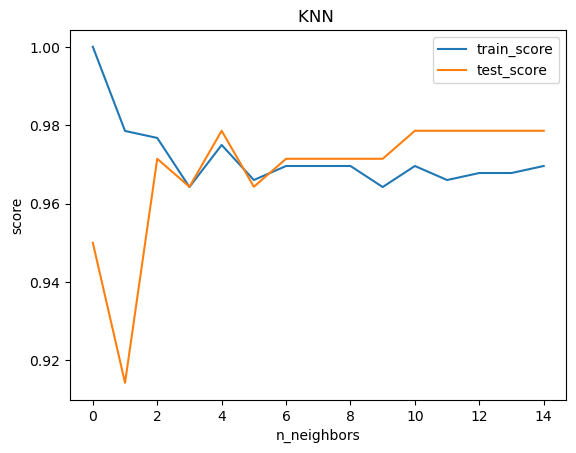

In [304]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


X = df.drop(['Sample code number','Class 2 for Benign 4 for Malignant'],axis =1)
y = df['Class 2 for Benign 4 for Malignant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_score = []
test_score =[]
for n in range(15):
    clf = KNeighborsClassifier(n_neighbors=n+1)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

x= range(len(test_score))

plt.plot(x,train_score, label ='train_score')
plt.plot(x,test_score,label ='test_score')

  
# Function add a legend  
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
plt.title("KNN ")
plt.show()



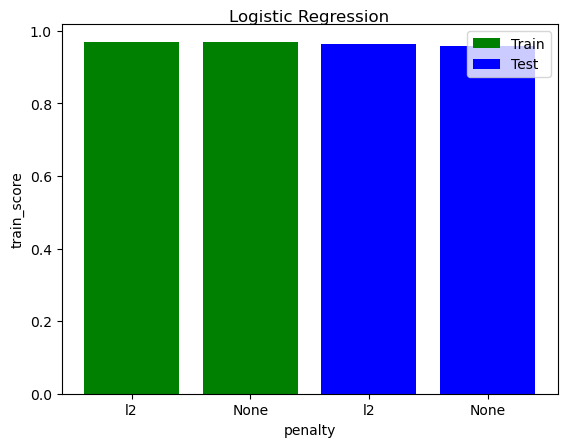

In [8]:
from sklearn.linear_model import LogisticRegression


X = df.drop(['Sample code number','Class 2 for Benign 4 for Malignant'],axis =1)
y = df['Class 2 for Benign 4 for Malignant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_score = []
test_score =[]
penalty =[ 'l2' , None]
penalty_list =[ 'l2' , 'None']
for penalty in penalty:
    clf = LogisticRegression(random_state=42,penalty = penalty)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

index =[0,1]
index_test = [2,3]
plt.bar(index, train_score, color='green',label ='Train')
plt.xticks(index, penalty_list)
plt.bar(index_test, test_score, color='blue',label ='Test')
plt.xticks(index + index_test, penalty_list+penalty_list)
  
# displaying the title
plt.xlabel('penalty')
plt.ylabel('train_score')
plt.legend()
plt.title(label='Logistic Regression', 
          fontweight=10, 
          pad='2.0')
plt.show()
# clf.score(X, y)

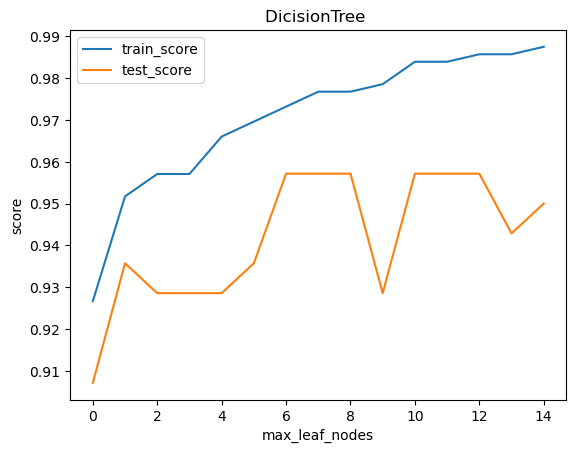

In [309]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


X = df.drop(['Sample code number','Class 2 for Benign 4 for Malignant'],axis =1)
y = df['Class 2 for Benign 4 for Malignant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_score = []
test_score =[]
for n in range(15):
    clf = DecisionTreeClassifier(max_leaf_nodes=n+2)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

x= range(len(test_score))

plt.plot(x,train_score, label ='train_score')
plt.plot(x,test_score,label ='test_score')

  
# Function add a legend  
plt.ylabel('score')
plt.xlabel('max_leaf_nodes')
plt.legend()
plt.title("DicisionTree ")
plt.show()


In [10]:
from sklearn.svm import SVC

X = df.drop(['Sample code number','Class 2 for Benign 4 for Malignant'],axis =1)
y = df['Class 2 for Benign 4 for Malignant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score =clf.score(X_test, y_test)

print('For SVC, the train score is ',train_score)
print('For SVC, the test score is ',test_score)

For SVC, the train score is  0.9749552772808586
For SVC, the test score is  0.9714285714285714


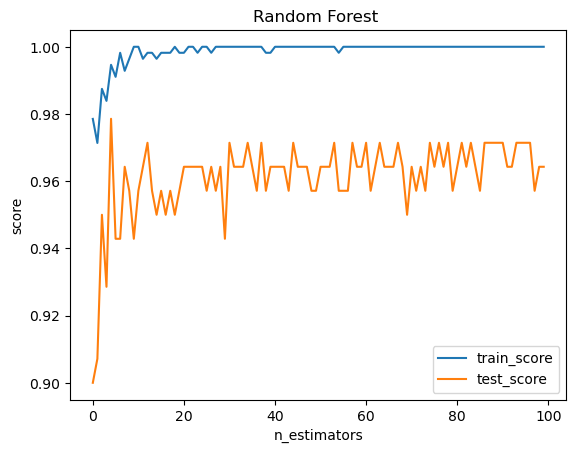

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)


X = df.drop(['Sample code number','Class 2 for Benign 4 for Malignant'],axis =1)
y = df['Class 2 for Benign 4 for Malignant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_score = []
test_score =[]
for n in range(100):
    clf = RandomForestClassifier(n_estimators= n+1)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

x= range(len(test_score))

plt.plot(x,train_score, label ='train_score')
plt.plot(x,test_score,label ='test_score')

  
# Function add a legend  
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()
plt.title("Random Forest ")
plt.show()


# Q2

In [12]:
from sklearn.ensemble import AdaBoostClassifier 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

X_train = df_train.drop('label',axis = 1)
y_train = df_train['label']

X_test = df_test.drop('label',axis = 1)
y_test = df_test['label']

algorithm_list = ['Random Forest','KNN','Logistic Regression','SVC','Adaboost']

In [14]:

clf_RF = RandomForestClassifier(max_depth = 10,n_estimators= 20)
clf_RF.fit(X_train, y_train)
a = clf_RF.score(X_test, y_test)

In [15]:
clf_KNN = KNeighborsClassifier(n_neighbors=10)
clf_KNN.fit(X_train, y_train)
b = clf_KNN.score(X_test, y_test)

In [16]:
clf_LR = LogisticRegression(random_state=42,penalty = 'l2')
clf_LR.fit(X_train, y_train)
c = clf_LR.score(X_test, y_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
clf_SVC = SVC()
clf_SVC.fit(X_train, y_train)
d = clf_SVC.score(X_test, y_test)

In [18]:
clf_ADA = AdaBoostClassifier(n_estimators=100,learning_rate=0.5)
clf_ADA.fit(X_train, y_train)
e = clf_ADA.score(X_test, y_test)

In [316]:
# y_pred = clf.predict(X_train)
# confusion_matrix(y_train,y_pred)
print(d)

0.9792


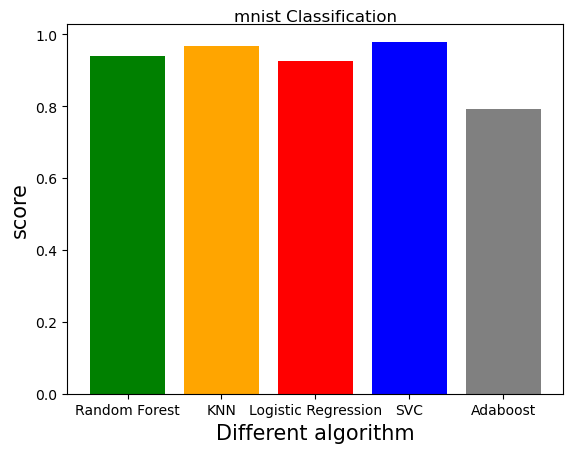

In [315]:
algorithm_list = ['Random Forest','KNN','Logistic Regression','SVC','Adaboost']
score=[a,b,c,d,e]


index =[0,1,2,3,4]

plt.bar(index, score, color=['green','orange','red','blue','grey'],label ='score')
plt.xticks(index, algorithm_list)

  
# displaying the title
plt.xlabel('Different algorithm', fontsize=15)
plt.ylabel('score', fontsize=15)
plt.title(label='mnist Classification', fontweight=20, pad='2.0')
plt.show()

In [ ]:
# best performance = SVC , so i make SVC's cpnfusion matrix

In [23]:
y_test_pred = clf_SVC.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[ 973,    0,    1,    0,    0,    2,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1006,    2,    1,    0,    2,    7,    6,    1],
       [   0,    0,    2,  995,    0,    2,    0,    5,    5,    1],
       [   0,    0,    5,    0,  961,    0,    3,    0,    2,   11],
       [   2,    0,    0,    9,    0,  871,    4,    1,    4,    1],
       [   6,    2,    0,    0,    2,    3,  944,    0,    1,    0],
       [   0,    6,   11,    1,    1,    0,    0,  996,    2,   11],
       [   3,    0,    2,    6,    3,    2,    2,    3,  950,    3],
       [   3,    4,    1,    7,   10,    2,    1,    7,    4,  970]],
      dtype=int64)

# Q3

In [319]:
# data import
import pandas as pd
import numpy as np
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [321]:
df[df.TotalCharges==(' ') ]  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [322]:
# data cleaning and preprocessing
drop_list = [item for item in df[df.TotalCharges==(' ') ].index]
# drop_list
# df.drop(drop_list,axis = 0)
df = df.drop(drop_list,axis = 0)
df.TotalCharges = df.TotalCharges.astype('float64')

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [324]:
#  one hot encoding 

df_to_be_onehot = df.drop(['customerID','Churn'],axis =1)
data_dum = pd.get_dummies(df_to_be_onehot)
df_onehot = pd.DataFrame(data_dum)
# df_onehot.info()


# normalized

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(df_onehot)



In [325]:
df_onehot

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [326]:
X_norm

array([[0.        , 0.        , 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.46478873, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.01408451, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.14084507, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.04225352, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91549296, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [394]:
# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X = X_norm
y = df['Churn'].replace({'Yes':1,'No':0})
featureSelect = SelectKBest(f_classif, k=20)
featureSelect.fit(X, y)
X_new = featureSelect.transform(X)
# X_new = X
X_train, X_test, y_train, y_test_Q3 = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [395]:
featureSelect.get_feature_names_out()

array(['x1', 'x2', 'x3', 'x16', 'x17', 'x18', 'x19', 'x21', 'x22', 'x24',
       'x25', 'x27', 'x28', 'x31', 'x34', 'x36', 'x38', 'x39', 'x40',
       'x43'], dtype=object)

In [396]:
# X.shape
X_new.shape

(7032, 20)

In [397]:
clf_Q3_knn = KNeighborsClassifier(n_neighbors=20)
clf_Q3_knn.fit(X_train, y_train)
clf_Q3_knn.score(X_test, y_test_Q3)

0.7746979388770433

In [398]:
clf_Q3_RF = RandomForestClassifier(max_depth = 15,n_estimators= 100)
clf_Q3_RF.fit(X_train, y_train)
clf_Q3_RF.score(X_test, y_test_Q3)


0.7910447761194029

In [399]:
clf_Q3_LR = LogisticRegression(random_state=42,penalty = 'l2')
clf_Q3_LR.fit(X_train, y_train)
clf_Q3_LR.score(X_test, y_test_Q3)

0.7938877043354655

In [400]:
from sklearn.ensemble import GradientBoostingClassifier
clf_Q3_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05,
                                        max_depth=20, random_state=42, 
                                        min_samples_split=10, min_samples_leaf=10)
clf_Q3_GBC.fit(X_train, y_train)
clf_Q3_GBC.score(X_test, y_test_Q3)


0.7739872068230277

In [401]:
clf_Q3_SVC = SVC(C=14 ,kernel='rbf',gamma =0.5)
clf_Q3_SVC.fit(X_train, y_train)
clf_Q3_SVC.score(X_test, y_test_Q3)

0.798862828713575

In [402]:
clf_Q3_ADA = AdaBoostClassifier(n_estimators=100,learning_rate=0.5,random_state=42)
clf_Q3_ADA.fit(X_train, y_train)
clf_Q3_ADA.score(X_test, y_test_Q3)

0.7889125799573561

In [408]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
y_pred_Q3 = clf_Q3_SVC.predict(X_test)
print('accuracy_score  = ',accuracy_score(y_pred_Q3,y_test_Q3))
print('precision_score  = ',precision_score(y_pred_Q3,y_test_Q3,pos_label =0))
print('recall_score  = ',recall_score(y_pred_Q3,y_test_Q3,pos_label =0))
print('f1_score  = ',f1_score(y_pred_Q3,y_test_Q3,pos_label =0))
print('confusion_matrix  = ')
print(confusion_matrix(y_pred_Q3,y_test_Q3))

accuracy_score  =  0.798862828713575
precision_score  =  0.8896418199419167
recall_score  =  0.8446691176470589
f1_score  =  0.8665723715228666
confusion_matrix  = 
[[919 169]
 [114 205]]


In [339]:
set(y_pred)


{0, 1}